In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris1.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = data.iloc[:,2:4].values
Y = data.iloc[:,4].values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [5]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state = 5)

In [6]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)
# Le = LabelEncoder()
# train_y = Le.fit_transform(train_y)
# test_y = Le.fit_transform(test_y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
Rdc = RandomForestClassifier(n_estimators = 10,random_state = 5)

In [9]:
Rdc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [10]:
pred_y = Rdc.predict(test_x)

In [11]:
pred_y

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [70]:
confusion_matrix(test_y,pred_y)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]], dtype=int64)

In [71]:
print(classification_report(test_y,pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [72]:
accuracy_score(test_y,pred_y)

0.9736842105263158

In [15]:
Rdc.predict(sc.fit_transform([[1.4,0.2]]))

array(['Iris-versicolor'], dtype=object)

ValueError: could not convert string to float: 'Iris-setosa'

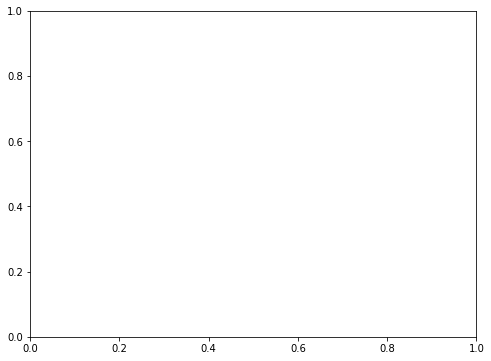

In [73]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))
x_set,y_set = train_x,train_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),np.arange(start = x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,Rdc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.60,cmap = ListedColormap(("red",'blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(("red",'blue','green'))(i),label=j)
plt.title('Random Forest (Training set)')
plt.legend()
plt.show()
# ['setosa'=0,'versicolor'=1,'virginica'=2]

ValueError: could not convert string to float: 'Iris-setosa'

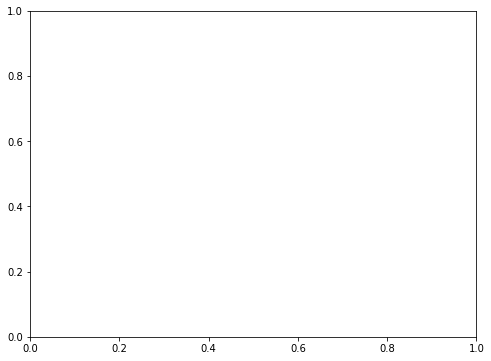

In [74]:
plt.figure(figsize=(8,6))
x_set,y_set = test_x,pred_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),np.arange(start = x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,Rdc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.60,cmap = ListedColormap(("red",'blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(("red",'blue','green'))(i),label=j)
plt.title('Random Forest (Testing set)')
plt.legend()
plt.show()

In [80]:
 y=Rdc.predict(sc.fit_transform([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4]]))

In [81]:
y

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)